Data Set–Winequality-red

In class Assignment Expectations/Steps -

Apply Data Cleaning to the Datasets and then apply Agglomerative clustering for find pattern and the best value for the following features.



In [1]:
# import library
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

In [2]:
# import dataset
df=pd.read_csv("winequality-red.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()/len(df)*100

fixed_acidity           0.0
volatile_acidity        0.0
citric_acid             0.0
residual_sugar          0.0
chlorides               0.0
free_sulfur_dioxide     0.0
total_sulfur_dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [7]:
df.shape

(1599, 12)

In [8]:
# treat outliers

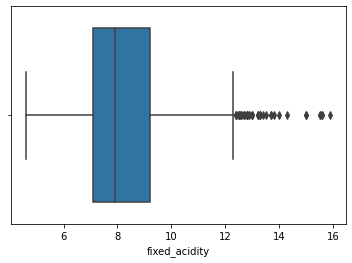

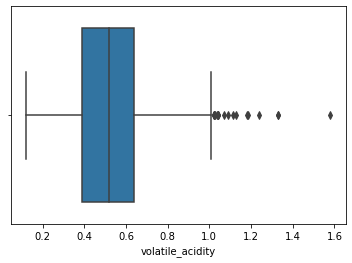

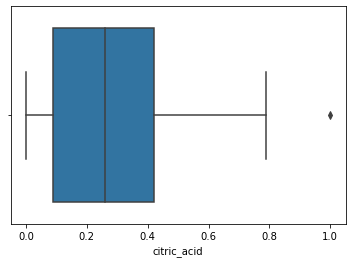

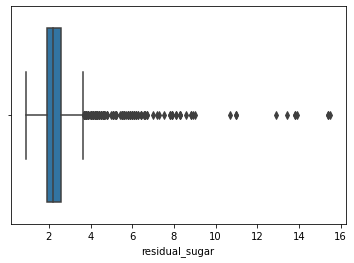

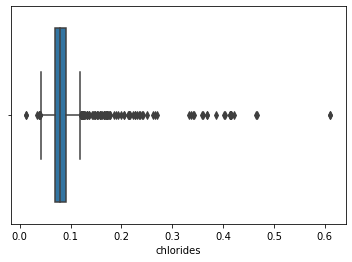

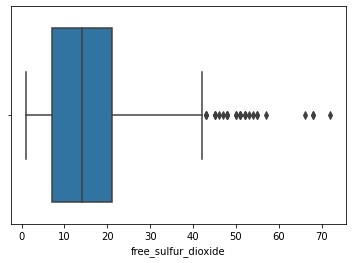

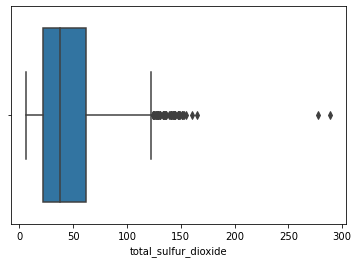

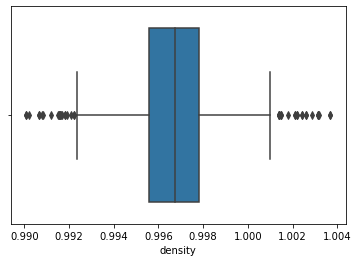

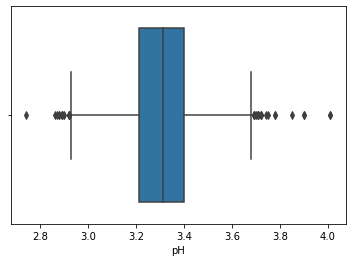

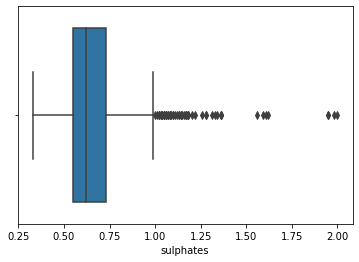

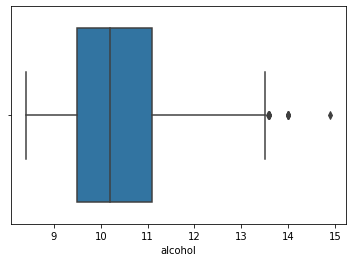

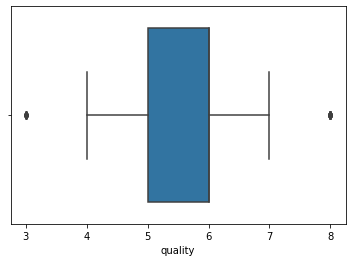

In [9]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

In [10]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df=df[~((df<(Q1-1.5*IQR))|(df>(Q3+1.5*IQR))).any(axis=1)]
df.shape

(1179, 12)

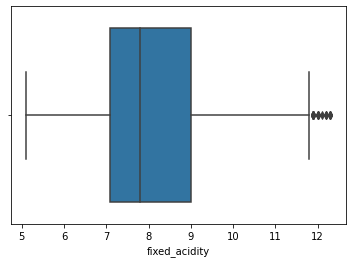

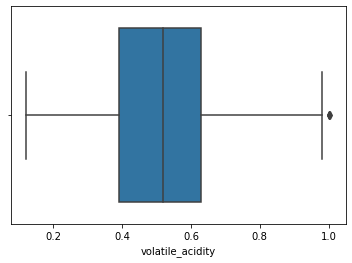

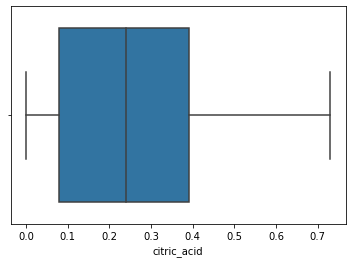

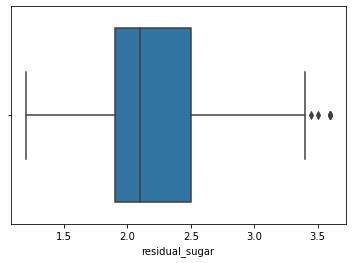

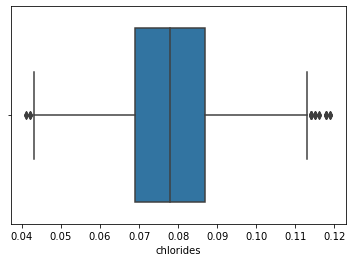

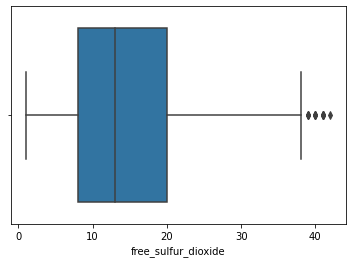

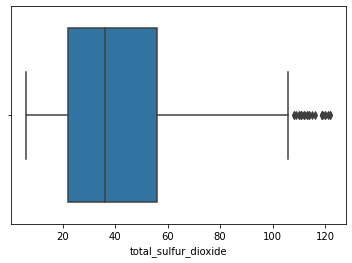

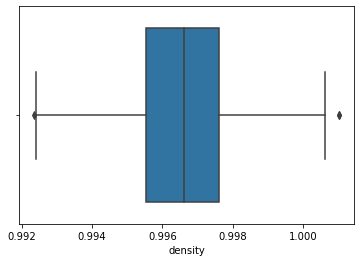

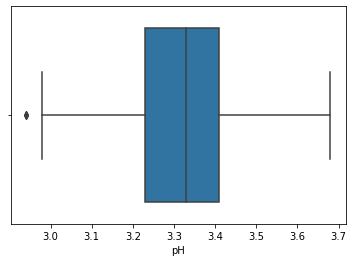

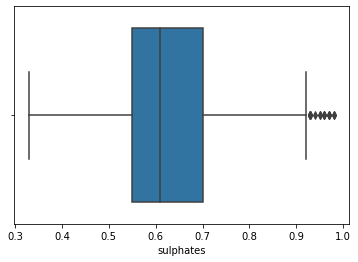

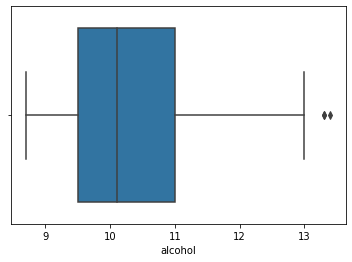

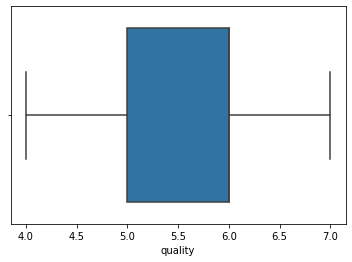

In [11]:
for i in df.columns:
    sns.boxplot(df[i])
    plt.show()

1. Use feautes fixed acidity and volatile acidity


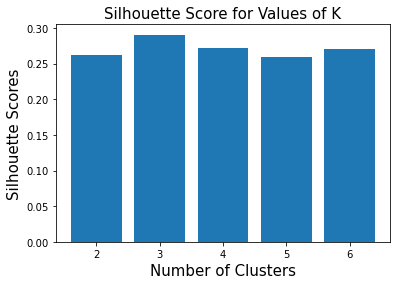

In [58]:
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above plot shows that the Silhouette score for K = 3 is the highest. This implies that K = 3 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 3 as the optimal value for the number of clusters. Now we retrieve the clusters and visualize the data.

In [12]:
# select the variables for model building and store it in 'features'
features = df[["fixed_acidity","volatile_acidity"]]

In [13]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [14]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [15]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Check the size of each cluster.

In [16]:
# check the size of each cluster
df['Cluster'].value_counts()

0    616
1    563
Name: Cluster, dtype: int64

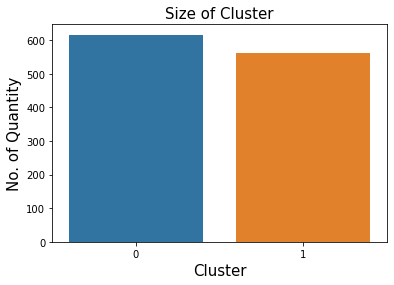

In [17]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `fixed_acidity` and `volatile_acidity` to visualize the clusters.

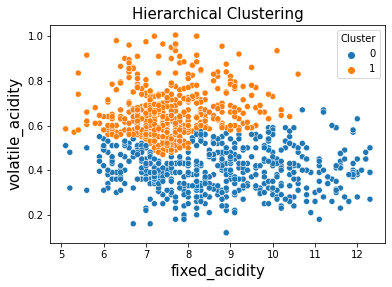

In [18]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'fixed_acidity', y = 'volatile_acidity', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('fixed_acidity', fontsize = 15)
plt.ylabel('volatile_acidity', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The largest cluster is shown by the blue color in the above plot.

2. Use feautesCirtic acidity and fixed acidity


In [19]:
# select the variables for model building and store it in 'features'
features = df[["citric_acid","fixed_acidity"]]

In [20]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [21]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [22]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Check the size of each cluster.

In [23]:
# check the size of each cluster
df['Cluster'].value_counts()

0    996
1    183
Name: Cluster, dtype: int64

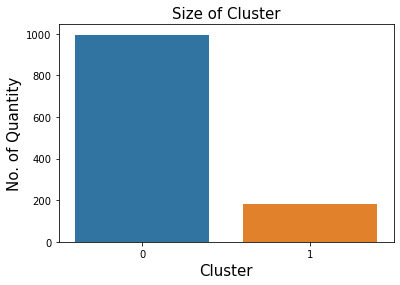

In [24]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `citric_acid` and `fixed_acidity` to visualize the clusters.

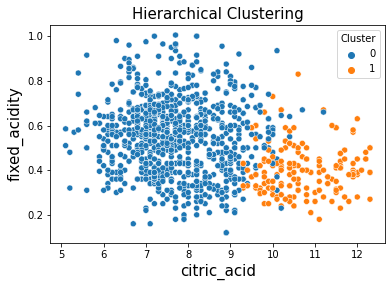

In [25]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'fixed_acidity', y = 'volatile_acidity', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('citric_acid', fontsize = 15)
plt.ylabel('fixed_acidity', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** Both variable are equaly clustered.

3. Use feautes residual suger and sulphades


In [26]:
# select the variables for model building and store it in 'features'
features = df[["residual_sugar","sulphates"]]

In [27]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [28]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [29]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Check the size of each cluster.

In [30]:
# check the size of each cluster
df['Cluster'].value_counts()

0    859
1    320
Name: Cluster, dtype: int64

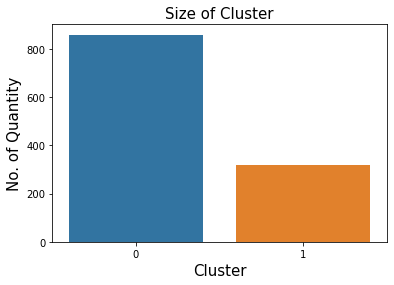

In [31]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `residual_sugar` and `sulphates` to visualize the clusters.

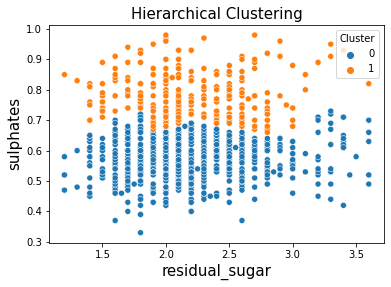

In [32]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'residual_sugar', y = 'sulphates', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('residual_sugar', fontsize = 15)
plt.ylabel('sulphates', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** Both variable are equaly clustered.

4. Use feautesfree.sulfur.dioxide and total.sulfur.dioxide


In [33]:
df.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'Cluster'],
      dtype='object')

In [34]:
# select the variables for model building and store it in 'features'
features = df[["free_sulfur_dioxide","total_sulfur_dioxide"]]

In [35]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [36]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [37]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Check the size of each cluster.

In [38]:
# check the size of each cluster
df['Cluster'].value_counts()

1    691
0    488
Name: Cluster, dtype: int64

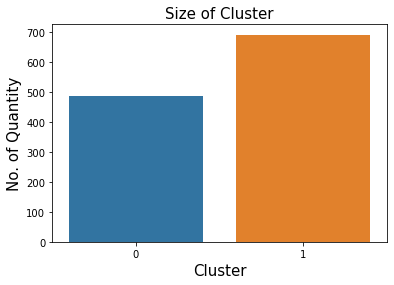

In [39]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `free_sulfur_dioxide` and `total_sulfur_dioxide` to visualize the clusters.

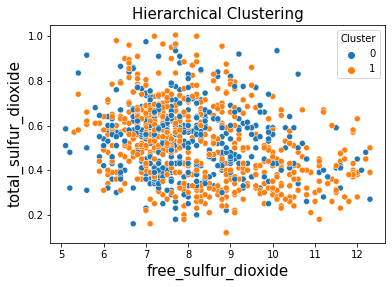

In [40]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'fixed_acidity', y = 'volatile_acidity', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('free_sulfur_dioxide', fontsize = 15)
plt.ylabel('total_sulfur_dioxide', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The largest cluster is shown by the Orange color in the above plot.

5. Use feautes fixed acidity, citric acidity and volatile acidity


In [41]:
# select the variables for model building and store it in 'features'
features = df[["fixed_acidity","citric_acid","volatile_acidity"]]

In [42]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [43]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [44]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


Check the size of each cluster.

In [45]:
# check the size of each cluster
df['Cluster'].value_counts()

1    617
0    562
Name: Cluster, dtype: int64

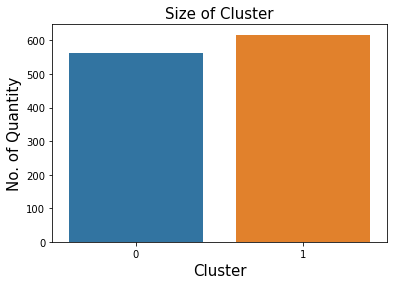

In [46]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `fixed_acidity` and `volatile_acidity` to visualize the clusters.

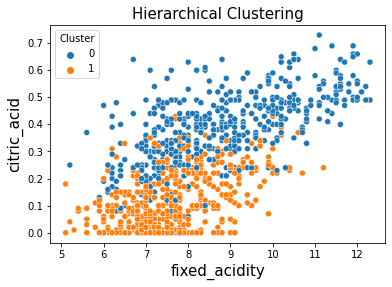

In [47]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'fixed_acidity',y="citric_acid", data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('fixed_acidity', fontsize = 15)
plt.ylabel('citric_acid', fontsize = 15)

# display the plot
plt.show()

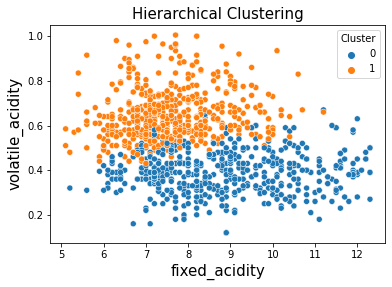

In [48]:
sns.scatterplot(x = 'fixed_acidity',y="volatile_acidity", data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('fixed_acidity', fontsize = 15)
plt.ylabel('volatile_acidity', fontsize = 15)

# display the plot
plt.show()

**Interpretation:**  The largest cluster is shown by the blue color in the above plot.

6. Use feautes density and pH


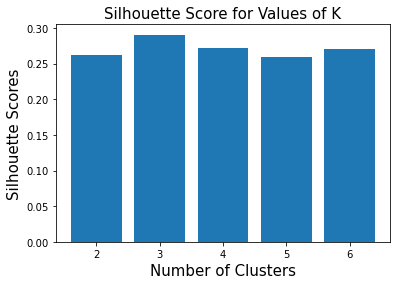

In [57]:
K = [2,3,4,5,6]

# consider an empty list tot store the Silhouette score
silhouette_scores = [] 

# consider a for loop to perform clustering for different values of K
for i in K:
    
    # instantiate clustering for each value of K
    model = AgglomerativeClustering(n_clusters = i) 
    
    # calculate the Silhouette score and append to the list 'silhouette_scores'
    silhouette_scores.append(silhouette_score(features_scaled, model.fit_predict(features_scaled))) 
    
# plot the Silhouette score for different K
plt.bar(K, silhouette_scores) 

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Silhouette Score for Values of K', fontsize = 15)
plt.xlabel('Number of Clusters', fontsize = 15) 
plt.ylabel('Silhouette Scores', fontsize = 15)

# display the plot
plt.show()

**Interpretation:** The above plot shows that the Silhouette score for K = 3 is the highest. This implies that K = 3 is the optimal value for number of clusters.

Both the dendrogram and Silhouette score method returns K = 3 as the optimal value for the number of clusters. Now we retrieve the clusters and visualize the data.

In [49]:
# select the variables for model building and store it in 'features'
features = df[["density","pH"]]

In [50]:
# instantiate the 'StandardScaler'
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

In [51]:
# instantiate clustering method with 2 clusters and 'ward' linkage method
clusters = AgglomerativeClustering(n_clusters=2, linkage='ward')

# fit the model on the scaled data
clusters.fit(features_scaled)

AgglomerativeClustering()

In [52]:
# add a column containing cluster number to the original data
df['Cluster'] = clusters.labels_

# print head() of the newly formed dataframe
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Cluster
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


Check the size of each cluster.

In [53]:
# check the size of each cluster
df['Cluster'].value_counts()

0    621
1    558
Name: Cluster, dtype: int64

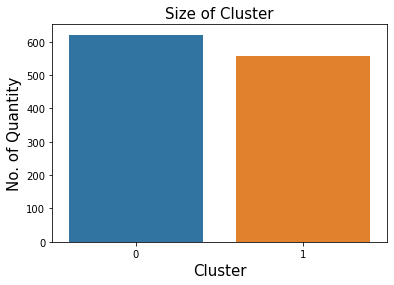

In [54]:
# plot the countplot for the cluster size
sns.countplot(data = df, x = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Size of Cluster', fontsize = 15)
plt.xlabel('Cluster', fontsize = 15)
plt.ylabel('No. of Quantity', fontsize = 15)

# display the plot
plt.show()

Now let us visualize the clusters. As we have more than 2 features, we consider only the variables `density` and `pH` to visualize the clusters.

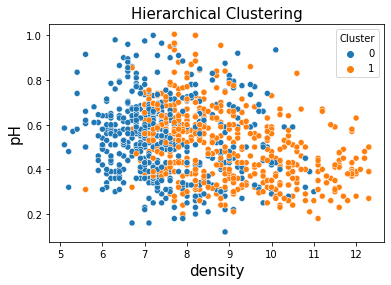

In [55]:
# plot the scatterplot to visualize the clusters
sns.scatterplot(x = 'fixed_acidity', y = 'volatile_acidity', data = df, hue = 'Cluster')

# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Hierarchical Clustering', fontsize = 15)
plt.xlabel('density', fontsize = 15)
plt.ylabel('pH', fontsize = 15)

# display the plot
plt.show()